In [1]:
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.optimizers import SGD, Adam

import numpy as np

print(tf.__version__)

2.8.0


In [2]:
# train data 
# t_data = 2*x1 -3*x2 + 2*x3

x_data = np.array([ [1, 2, 0], [5, 4, 3], [1, 2, -1], [3, 1, 0], [2, 4, 2], 
                    [4, 1, 2], [-1, 3, 2], [4, 3, 3], [0, 2, 6], [2, 2, 1],
                    [1, -2, -2], [0, 1, 3], [1, 1, 3], [0, 1, 4], [2, 3, 3] ])

t_data = np.array([-4, 4, -6, 3, -4, 
                   9, -7, 5, 6, 0,
                   4, 3, 5, 5, 1])

print('x_data.shape = ', x_data.shape, ', t_data.shape = ', t_data.shape)

x_data.shape =  (15, 3) , t_data.shape =  (15,)


In [5]:
# Linear Regression 을 keras 이용하여 생성

model = Sequential()

model.add(Dense(1, input_shape=(3, ), activation='linear'))  # 노드 3개인 출력층 생성

In [6]:
# 모델 컴파일 - 학습을 위한 optimizer, 손실함수 loss 정의

model.compile(optimizer=SGD(learning_rate=1e-2), loss='mse')

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 1)                 4         
                                                                 
Total params: 4
Trainable params: 4
Non-trainable params: 0
_________________________________________________________________


In [8]:
from datetime import datetime

start_time = datetime.now()

hist = model.fit(x_data, t_data, epochs=1000)

end_time = datetime.now()

print('\nElapsed Time => ', end_time - start_time)

Epoch 1/1000
1/1 [==============================] - 2s 2s/step - loss: 29.7670
Epoch 2/1000
1/1 [==============================] - 0s 9ms/step - loss: 25.8749
Epoch 3/1000
1/1 [==============================] - 0s 10ms/step - loss: 23.1872
Epoch 4/1000
1/1 [==============================] - 0s 9ms/step - loss: 21.1619
Epoch 5/1000
1/1 [==============================] - 0s 9ms/step - loss: 19.5241
Epoch 6/1000
1/1 [==============================] - 0s 19ms/step - loss: 18.1316
Epoch 7/1000
1/1 [==============================] - 0s 11ms/step - loss: 16.9084
Epoch 8/1000
1/1 [==============================] - 0s 12ms/step - loss: 15.8120
Epoch 9/1000
1/1 [==============================] - 0s 10ms/step - loss: 14.8170
Epoch 10/1000
1/1 [==============================] - 0s 11ms/step - loss: 13.9070
Epoch 11/1000
1/1 [==============================] - 0s 8ms/step - loss: 13.0703
Epoch 12/1000
1/1 [==============================] - 0s 7ms/step - loss: 12.2983
Epoch 13/1000
1/1 [=============

In [9]:
# hist 타입 및 key 확인

print(type(hist))
print(hist.history.keys())

<class 'keras.callbacks.History'>
dict_keys(['loss'])


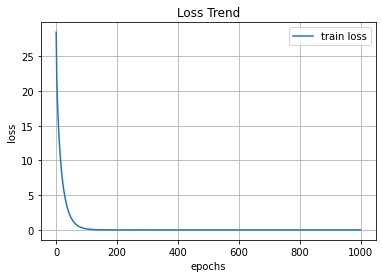

In [ ]:
# 손실함수 출력

import matplotlib.pyplot as plt

plt.title('Loss Trend')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.grid()

plt.plot(hist.history['loss'], label='train loss')
plt.legend(loc='best')

plt.show()

In [10]:
# 예측,  ret_val = 2*x1 -3*x2 + 2*x3

test_data = [ [5, 5, 0], [2, 3, 1], [-1, 0, -1], [10, 5, 2], [4, -1, -2] ]

ret_val = [ 2*data[0] -3*data[1] + 2*data[2]  for data in test_data ]

prediction_val = model.predict(np.array(test_data))

print(prediction_val)
print('==================')
print(ret_val)

[[-5.000297 ]
 [-2.9999187]
 [-3.9992712]
 [ 8.999153 ]
 [ 7.0004463]]
[-5, -3, -4, 9, 7]


In [11]:
# 모델 입력, 출력, 가중치 확인

print(model.input)
print(model.output)
print(model.weights)

KerasTensor(type_spec=TensorSpec(shape=(None, 3), dtype=tf.float32, name='dense_1_input'), name='dense_1_input', description="created by layer 'dense_1_input'")
KerasTensor(type_spec=TensorSpec(shape=(None, 1), dtype=tf.float32, name=None), name='dense_1/BiasAdd:0', description="created by layer 'dense_1'")
[<tf.Variable 'dense_1/kernel:0' shape=(3, 1) dtype=float32, numpy=
array([[ 1.9999137],
       [-3.00009  ],
       [ 1.9999406]], dtype=float32)>, <tf.Variable 'dense_1/bias:0' shape=(1,) dtype=float32, numpy=array([0.00058329], dtype=float32)>]
